## How to apply for API access

You will need to obtain access to the API. Follow the link:
https://developer.twitter.com/en/apply-for-access

Couple other useful links:
https://developer.twitter.com/en/docs
https://developer.twitter.com/en/docs/tutorials

Create a Project in the developer portal

https://developer.twitter.com/en/docs/tutorials/step-by-step-guide-to-making-your-first-request-to-the-twitter-api-v2

Fantastic book that I followed: "Mining the Social Web" by Matthew Russell & Mikhail Klassen

## Configurations and Imports

In [2]:
## Inital installations
# !pip install twitter
# !pip install prettytable 
# !pip install nltk

In [18]:
import json
import twitter
from collections import Counter
from prettytable import PrettyTable

### Set up authorization and access

In [3]:
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

In [4]:
# select geo for which you want to get the tweets
# set 1 for world

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

#print(world_trends[0])
print()
print(us_trends[0])


{'trends': [{'name': 'Mario', 'url': 'http://twitter.com/search?q=Mario', 'promoted_content': None, 'query': 'Mario', 'tweet_volume': 507491}, {'name': 'Jack Black', 'url': 'http://twitter.com/search?q=%22Jack+Black%22', 'promoted_content': None, 'query': '%22Jack+Black%22', 'tweet_volume': 63797}, {'name': 'Panthers', 'url': 'http://twitter.com/search?q=Panthers', 'promoted_content': None, 'query': 'Panthers', 'tweet_volume': 56867}, {'name': 'Sam Darnold', 'url': 'http://twitter.com/search?q=%22Sam+Darnold%22', 'promoted_content': None, 'query': '%22Sam+Darnold%22', 'tweet_volume': None}, {'name': 'Texans', 'url': 'http://twitter.com/search?q=Texans', 'promoted_content': None, 'query': 'Texans', 'tweet_volume': 41950}, {'name': 'Kyland', 'url': 'http://twitter.com/search?q=Kyland', 'promoted_content': None, 'query': 'Kyland', 'tweet_volume': 19322}, {'name': '#NintendoDirect', 'url': 'http://twitter.com/search?q=%23NintendoDirect', 'promoted_content': None, 'query': '%23NintendoDire

## Retriving Trends

In [7]:
trends = []
for trend in world_trends[0]['trends']:
    trends.append(trend['name'])
print(trends)

['Mario', 'Switch', '#askhanbin', '#MTVMIAW2021', 'スプラ3', '#NintendoDirect', 'Jack Black', 'カービィ', '#TópicodetendênciaComprar', 'Luigi', 'Panthers', '#EliminaçãoAFazenda', 'Bayonetta 3', 'Kirby', 'Sam Darnold', 'アクトレイザー', 'ニンダイ', 'Texans', 'Medrado', 'カスタムロボ', 'Kyland', 'サンブレイク', 'ベヨネッタ3', 'Davis Mills', 'ヴァイオレット・エヴァーガーデン', 'DJ Moore', 'Charles Martinet', 'マスター', 'チョコボレーシング', 'Seth Rogen', 'モンハン', 'とうらぶ無双', 'マリオストーリー', 'Splatoon 3', 'バンカズ', 'ハトの巣', 'lary', 'ゴールデンアイ', '刀剣乱舞無双', 'Chano', 'ライズG', 'スプラトゥーン3', 'Fabiola', 'ムジュラ', '金曜ロードショー', 'チョコボGP', 'Q&A B.I ONLINE CONCERT', 'Danny Devito', 'Illumination', 'Donkey Kong']


In [8]:
trends = []
for trend in us_trends[0]['trends']:
    trends.append(trend['name'])
print(trends)

['Mario', 'Jack Black', 'Panthers', 'Sam Darnold', 'Texans', 'Kyland', '#NintendoDirect', 'Davis Mills', 'DJ Moore', 'Kirby', 'Bayonetta 3', '#CARvsHOU', '#SVU23Premiere', 'Charles Martinet', '#ForTonight', 'Seth Rogen', '#BigBrother', 'Splatoon 3', 'Switch', 'Anthony Miller', 'Joey Slye', 'Carolina', 'Danny Devito', 'Joe Brady', 'Jelani', 'Donkey Kong', 'Illumination', 'Joe Buck', 'Robby Anderson', 'Marshall', 'McCaffery', 'Hubbard', 'Toad', 'Actraiser', 'Brewster', 'Mark Meadows', 'Aaron Nola', 'Matt Rhule', 'Big D', 'Adam Gase', 'Bob Hoskins', 'Kash Doll', 'Triangle Strategy', 'Juan Soto', 'Keegan', 'Cereza', 'PETA', 'CMac', 'Jaycee', 'Brian Burns']


In [9]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Illumination', 'Kirby', 'Kyland', 'Splatoon 3', 'Panthers', 'Texans', 'Switch', 'Danny Devito', 'Donkey Kong', 'Seth Rogen', 'Mario', 'Bayonetta 3', '#NintendoDirect', 'Jack Black', 'Sam Darnold', 'DJ Moore', 'Davis Mills', 'Charles Martinet'}


## Find tweets with specific keywords

In [10]:
# In search for tweets about peanut allergy vaccine
q = 'peanut allergy vaccine'

count = 1000

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# https://developer.twitter.com/en/docs/twitter-api/tweets/filtered-stream/api-reference/get-tweets-search-stream
search_results = twitter_api.search.tweets(q=q, count=count)
scrapped = search_results['statuses']
len(scrapped)

16

In [11]:
print(scrapped[i].keys())
print()
print(scrapped[i]['user'].keys())

NameError: name 'i' is not defined

In [12]:
# Here are the tweets, 2nd from the top is the bullseye
for i in range(len(scrapped)):
    print()    
    print('Name          : ', scrapped[i]['user']['name'])
    print('Screen Name   : ', scrapped[i]['user']['screen_name'])
    print('# of followers: ', scrapped[i]['user']['followers_count'])
    print(scrapped[i]['text'])
    print('Favorites     : ', scrapped[i]['favorite_count'])
    print('Retweets      : ', scrapped[i]['retweet_count'])
    print('___________________')


Name          :  Harpua
Screen Name   :  Harpua71
# of followers:  371
@hieronious @WhosePolitics @DAnderson314 @nypost And a peanut allergy vaccine would be awesome for them.
Favorites     :  2
Retweets      :  0
___________________

Name          :  ResearchPool
Screen Name   :  ResearchPool
# of followers:  8910
$AGY #Allergy Therapeutics PLC Allergy Therapeutics: VLP Peanut heading towards US Phase I studies: Allergy Therape… https://t.co/6gEQL5RFwA
Favorites     :  0
Retweets      :  0
___________________

Name          :  vonnie gilbert
Screen Name   :  vgilbert5084
# of followers:  5
@polycomplexity @VP @POTUS reaction. Allergic reactions can happen to anyone for any reason(peanut allergies are a… https://t.co/6ZZyKAdngH
Favorites     :  0
Retweets      :  0
___________________

Name          :  Blake P
Screen Name   :  BlakeP36152368
# of followers:  1
@Kai2002z @ACME_Van @gabegutierrez @BillingsClinic The best one I heard was that she couldn’t get vaccinated becaus… https://t

In [13]:
statuses = search_results['statuses']
print(statuses)

[{'created_at': 'Wed Sep 22 20:56:15 +0000 2021', 'id': 1440782017138806786, 'id_str': '1440782017138806786', 'text': '@hieronious @WhosePolitics @DAnderson314 @nypost And a peanut allergy vaccine would be awesome for them.', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'hieronious', 'name': 'Hieronious', 'id': 1389588666708725764, 'id_str': '1389588666708725764', 'indices': [0, 11]}, {'screen_name': 'WhosePolitics', 'name': 'something witty', 'id': 730213920825344000, 'id_str': '730213920825344000', 'indices': [12, 26]}, {'screen_name': 'DAnderson314', 'name': 'DA', 'id': 1405943564, 'id_str': '1405943564', 'indices': [27, 40]}, {'screen_name': 'nypost', 'name': 'New York Post', 'id': 17469289, 'id_str': '17469289', 'indices': [41, 48]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id

In [14]:
# Iterate through 5 more batches ti see the full metadata
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))


Length of statuses 16
Length of statuses 16
{
 "created_at": "Wed Sep 22 20:56:15 +0000 2021",
 "id": 1440782017138806786,
 "id_str": "1440782017138806786",
 "text": "@hieronious @WhosePolitics @DAnderson314 @nypost And a peanut allergy vaccine would be awesome for them.",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "hieronious",
    "name": "Hieronious",
    "id": 1389588666708725764,
    "id_str": "1389588666708725764",
    "indices": [
     0,
     11
    ]
   },
   {
    "screen_name": "WhosePolitics",
    "name": "something witty",
    "id": 730213920825344000,
    "id_str": "730213920825344000",
    "indices": [
     12,
     26
    ]
   },
   {
    "screen_name": "DAnderson314",
    "name": "DA",
    "id": 1405943564,
    "id_str": "1405943564",
    "indices": [
     27,
     40
    ]
   },
   {
    "screen_name": "nypost",
    "name": "New York Post",
    "id": 17469289,
    "id_str": "17469289",
    "indic

In [15]:
# Here the text of the tweets with favorite counts and retweets
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


@hieronious @WhosePolitics @DAnderson314 @nypost And a peanut allergy vaccine would be awesome for them.
Favorites:  2
Retweets:  0

$AGY #Allergy Therapeutics PLC Allergy Therapeutics: VLP Peanut heading towards US Phase I studies: Allergy Therape… https://t.co/6gEQL5RFwA
Favorites:  0
Retweets:  0

@polycomplexity @VP @POTUS reaction. Allergic reactions can happen to anyone for any reason(peanut allergies are a… https://t.co/6ZZyKAdngH
Favorites:  0
Retweets:  0

@Kai2002z @ACME_Van @gabegutierrez @BillingsClinic The best one I heard was that she couldn’t get vaccinated becaus… https://t.co/bWkj5dye1U
Favorites:  3
Retweets:  0

RT @1LastRepublican: @Gitmo33 Anyone have an actual name of the child or any documentation of what really happened? 
Or are we just suppose…
Favorites:  0
Retweets:  1

@Gitmo33 Anyone have an actual name of the child or any documentation of what really happened? 
Or are we just supp… https://t.co/fhOoo9A4SI
Favorites:  27
Retweets:  1

@laurahelmuth @sciam 

## Extracting text, screen names, and hashtags from tweets

In [16]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "@hieronious @WhosePolitics @DAnderson314 @nypost And a peanut allergy vaccine would be awesome for them.",
 "$AGY #Allergy Therapeutics PLC Allergy Therapeutics: VLP Peanut heading towards US Phase I studies: Allergy Therape\u2026 https://t.co/6gEQL5RFwA",
 "@polycomplexity @VP @POTUS reaction. Allergic reactions can happen to anyone for any reason(peanut allergies are a\u2026 https://t.co/6ZZyKAdngH",
 "@Kai2002z @ACME_Van @gabegutierrez @BillingsClinic The best one I heard was that she couldn\u2019t get vaccinated becaus\u2026 https://t.co/bWkj5dye1U",
 "RT @1LastRepublican: @Gitmo33 Anyone have an actual name of the child or any documentation of what really happened? \nOr are we just suppose\u2026"
]
[
 "hieronious",
 "WhosePolitics",
 "DAnderson314",
 "nypost",
 "polycomplexity"
]
[
 "Allergy"
]
[
 "@hieronious",
 "@WhosePolitics",
 "@DAnderson314",
 "@nypost",
 "And"
]


## Words frequencies in the tweets

In [19]:
for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('peanut', 11), ('a', 8), ('vaccine', 8), ('the', 7), ('allergy', 6), ('as', 6), ('can', 5), ('that', 5), ('of', 5), ('Covid', 5)]

[('Gitmo33', 2), ('pattiefoto', 2), ('hieronious', 1), ('WhosePolitics', 1), ('DAnderson314', 1), ('nypost', 1), ('polycomplexity', 1), ('VP', 1), ('POTUS', 1), ('Kai2002z', 1)]

[('Allergy', 1)]



## Store results in a tabular format

In [45]:
for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+---------+-------+
| Word    | Count |
+---------+-------+
| peanut  |    11 |
| a       |     8 |
| vaccine |     8 |
| the     |     7 |
| allergy |     6 |
| as      |     6 |
| can     |     5 |
| that    |     5 |
| of      |     5 |
| Covid   |     5 |
+---------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| Gitmo33        |     2 |
| pattiefoto     |     2 |
| hieronious     |     1 |
| WhosePolitics  |     1 |
| DAnderson314   |     1 |
| nypost         |     1 |
| polycomplexity |     1 |
| VP             |     1 |
| POTUS          |     1 |
| Kai2002z       |     1 |
+----------------+-------+
+---------+-------+
| Hashtag | Count |
+---------+-------+
| Allergy |     1 |
+---------+-------+


## Calculating lexical diversity for tweets

In [47]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.6580645161290323
0.9310344827586207
1.0
19.375


## Finding the most popular retweets

In [25]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-----------------+---------------------+----------------------------------------------------+
| Count | Screen Name     | Tweet ID            | Text                                               |
+-------+-----------------+---------------------+----------------------------------------------------+
| 1     | pentony         | 1438977850846158854 | RT @pentony: @pattiefoto The peanut allergy that   |
|       |                 |                     | currently can kill many is as curable with the     |
|       |                 |                     | Covid vaccine as Covid is.                         |
| 1     | 1LastRepublican | 1439956622307069952 | RT @1LastRepublican: @Gitmo33 Anyone have an       |
|       |                 |                     | actual name of the child or any documentation of   |
|       |                 |                     | what really happened?                              |
|       |                 |                     | Or are we just suppose…

## Looking up users who have retweeted a status

In [48]:

# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=id)
#print([r['user']['screen_name'] for r in _retweets])

## Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

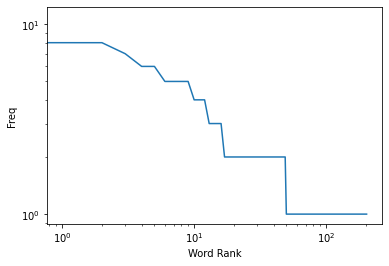

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Generating histograms of words, screen names, and hashtags

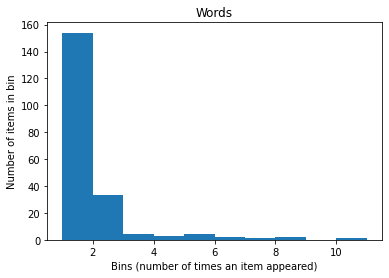

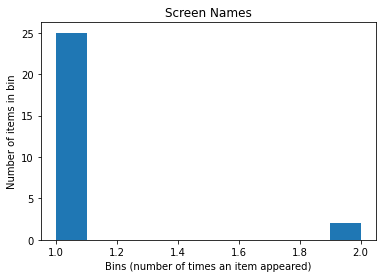

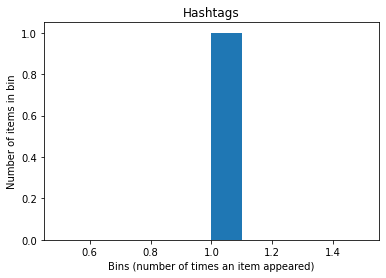

<Figure size 432x288 with 0 Axes>

In [28]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

## Generating a histogram of retweet counts

Text(0, 0.5, 'Number of tweets in bin')

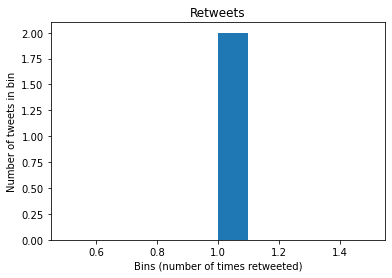

In [29]:

# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')